## Importation des bibliothèques

In [2]:
from timeit import default_timer as timer
from datetime import timedelta
from colorama import Style, Fore
import pandas
from sklearn.cluster import KMeans, AgglomerativeClustering
import utils

## Lecture des données

In [4]:
# Read the CSV
data = pandas.read_csv("../data/anthems.csv", delimiter=",", dtype={
    "Country": str,
    "Alpha-2": str,
    "Alpha-3": str,
    "Continent": str,
    "Anthem": str
})

## Premier aperçu

In [11]:
utils.dataframe.first_look(data)

Shape: (190, 5)
      Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  
0  Around our flag we stand united, With one wish...  
1  Our Fatherland, free, independent, That has fo...  
2  Land of mountains, land by the river, Land of ...  
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4  We, Belarusians, are peaceful people, Wholehea...  
Country      object
Alpha-2      object
Alpha-3      object
Continent    object
Anthem       object
dtype: object


## Valeurs manquantes

In [12]:
utils.dataframe.missing_values(data, keep_zeros=False)

Valeurs manquantes: 0.11%
Alpha-2    1 (0.53%)
dtype: object


## Extraction des colonnes
Les colonnes utiles au modèle sont extraite afin de ne pas donner des valeurs inutiles pouvant fausser la prédiction.

In [13]:
models_data = data[["Anthem"]]
models_data.sample(n=5)

,Anthem
74,"Sons and daughters of Saint Lucia, love the la..."
7,"Proud Balkan Mountains, next to it the Danube ..."
147,"My homeland, my homeland, my homeland, My love..."
6,You're the light of the soul Eternal fire's fl...
79,"Our country, which has become so old your head..."


## Pré-traitement du texte
Le texte des hymnes nationaux est d'abord nettoyé. Les ponctuations sont retirées, les "stopwords" aussi et le texte est "tokenisé".

In [14]:
def text_preprocessing(text):
    text_cleaned = utils.text.clean(text)
    token = utils.text.tokenize(text_cleaned, language="english")
    token = utils.text.remove_stopwords(token, language="english")
    token = utils.text.remove_punctuation(token)

    # PorterStemmer seems to produce less stable model, but it has a much better
    # inter-cluster distance than WordNetLemmatizer.
    token = utils.text.stem(token)

    return token

vectorized_data = utils.text.vectorization(models_data, col="Anthem", analyzer=text_preprocessing)
tfidf_vectorized_data = utils.text.tfidf_vectorization(models_data, col="Anthem", analyzer=text_preprocessing)

In [15]:
vectorized_data

,a,abandon,abanyarwanda,abid,abl,ablaz,abound,about,abov,absolut,...,youwonfor,zambezi,zambia,zambiaski,zeal,zealand,zealou,zenith,zimbabw,zion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,6,1,0,0,0,0,0,0


In [16]:
tfidf_vectorized_data

,a,abandon,abanyarwanda,abid,abl,ablaz,abound,about,abov,absolut,...,youwonfor,zambezi,zambia,zambiaski,zeal,zealand,zealou,zenith,zimbabw,zion
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
186,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
187,0.0,0.068195,0.0,0.0,0.0,0.0,0.000000,0.064389,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
188,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.590874,0.098479,0.0,0.0,0.0,0.0,0.000000,0.0


## Traitement par les modèles


#### Text processing with k_means ##########################################

~~~~ KElbowVisualizer ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


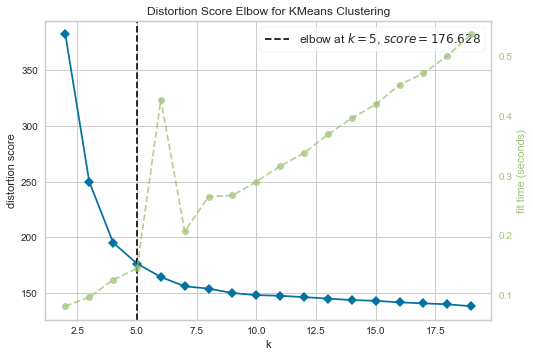

Optimal number of k cluster: 5

~~~~ SilhouetteVisualizer ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


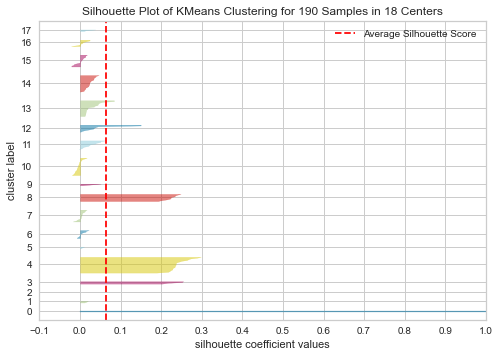

Optimal number of k cluster: 18 (score: 0.06)

~~~~ Optimal model ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Using n_clusters=12
                 Country Alpha-2 Alpha-3      Continent  \
70   Trinidad and Tobago      TT     TTO  North_America   
176           Seychelles      SC     SYC         Africa   
75               Grenada      GD     GRD  North_America   
63              Honduras      HN     HND  North_America   
101               Israel      IL     ISR           Asia   
126           Tajikistan      TJ     TJK           Asia   
38              Slovenia      SI     SVN         Europe   
5                Belgium      BE     BEL         Europe   
11               Denmark      DK     DNK         Europe   
90           Afghanistan      AF     AFG           Asia   

                                                Anthem  Cluster_k_means  
70   Forged from the love of liberty In the fires o...                3  
176  Seychelles, our only motherland Where we live ...    

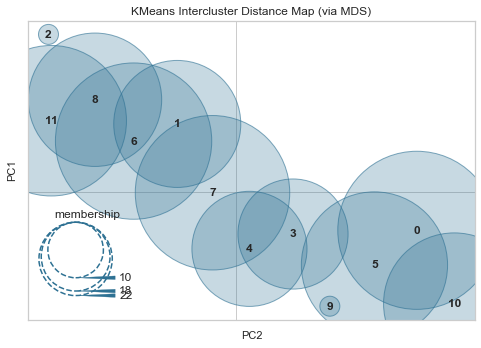

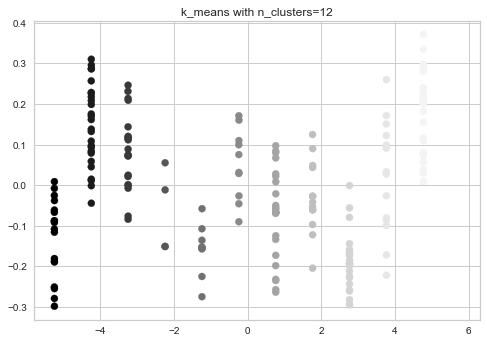

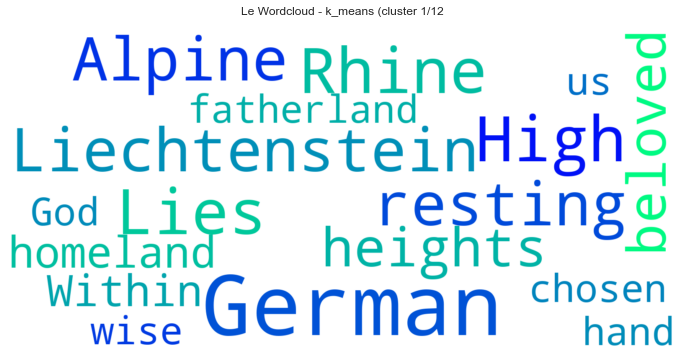

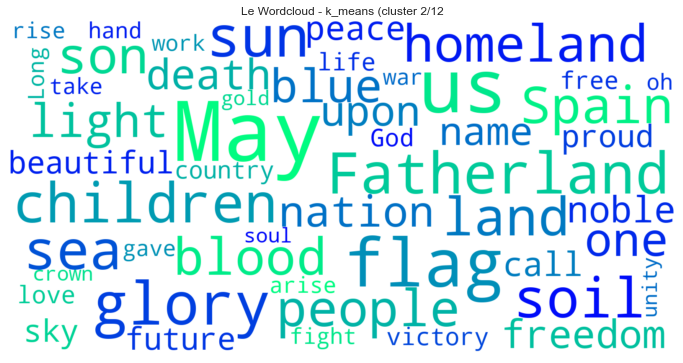

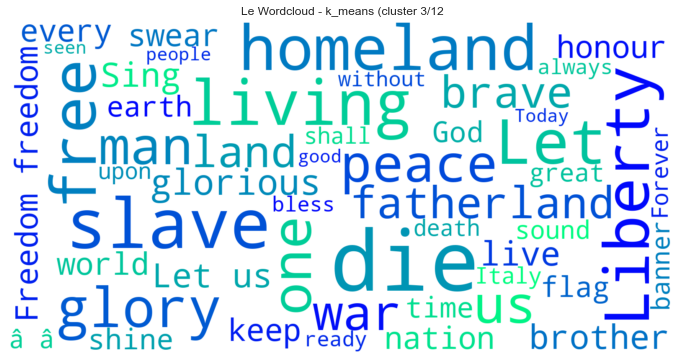

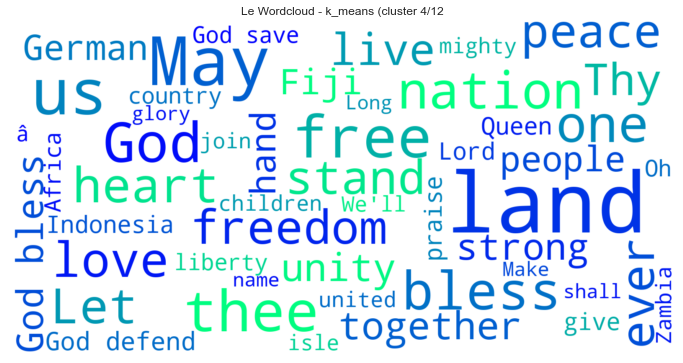

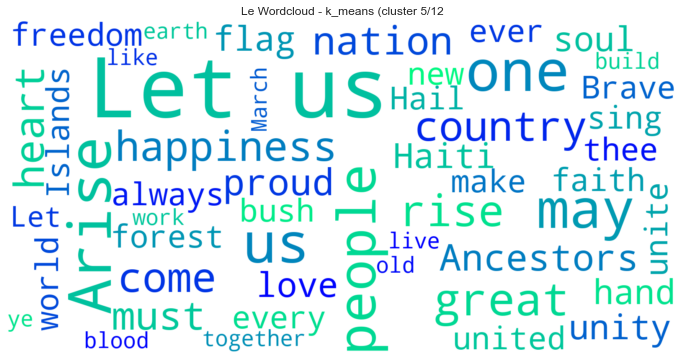

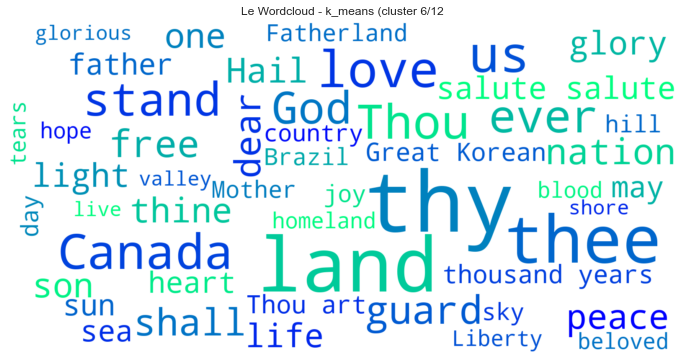

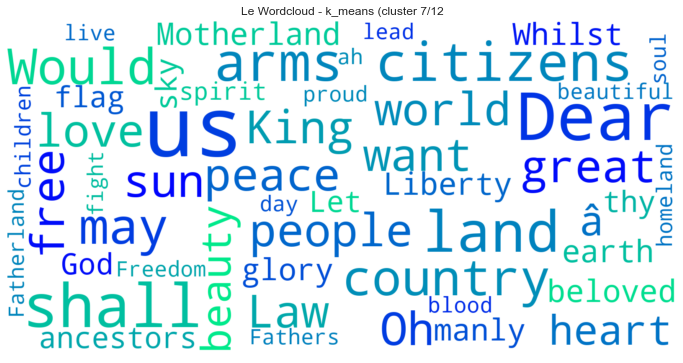

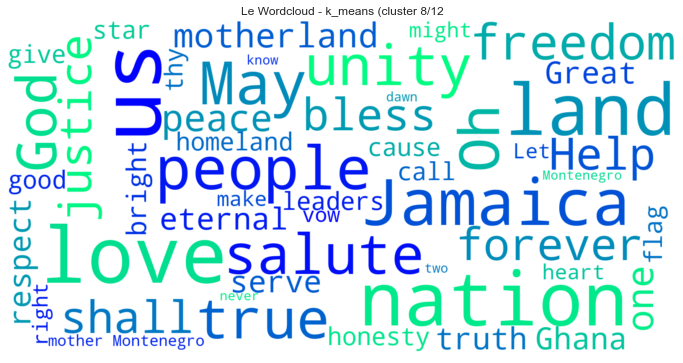

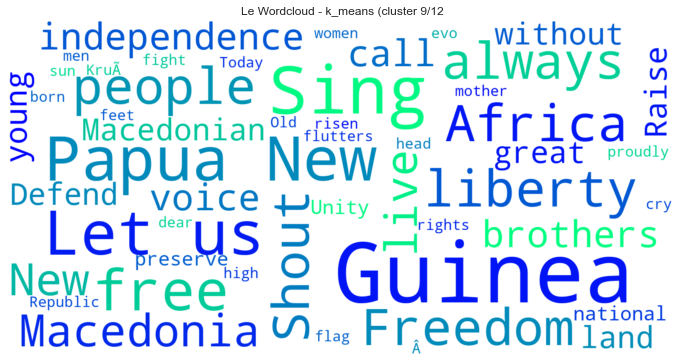

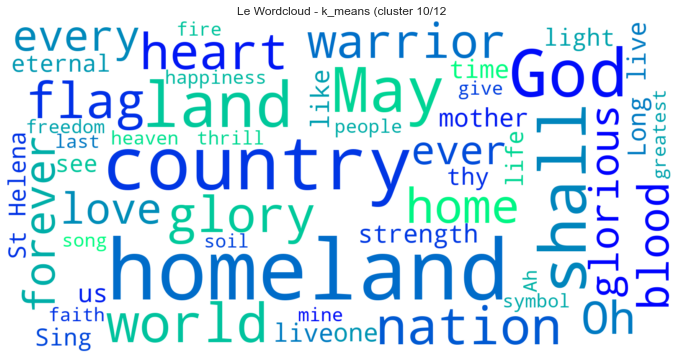

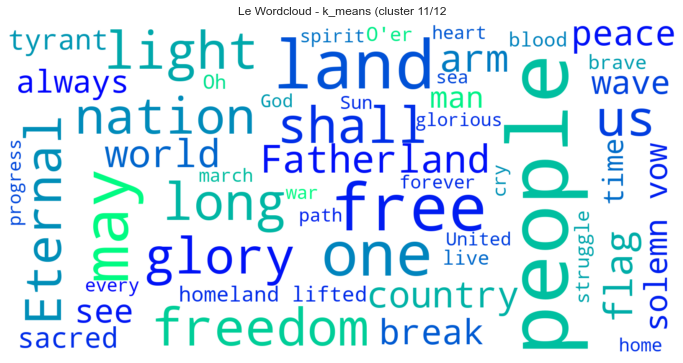

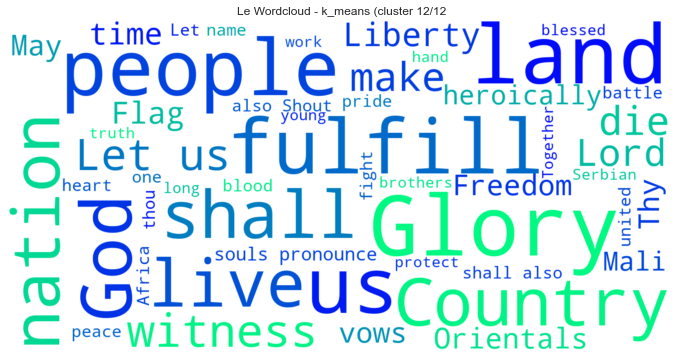


Finished in 0:00:20.339512.


#### Text processing with agglomerative_clustering #########################

~~~~ KElbowVisualizer ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


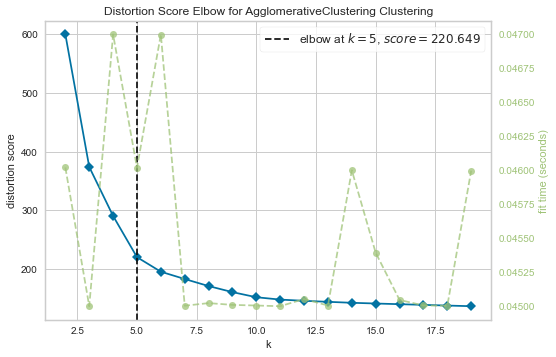

Optimal number of k cluster: 5

~~~~ Optimal model ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Using n_clusters=5
                 Country Alpha-2 Alpha-3      Continent  \
135               Angola      AO     AGO         Africa   
122            Singapore      SG     SGP           Asia   
138         Burkina Faso      BF     BFA         Africa   
89                 Tonga      TO     TON        Oceania   
76   Antigua and Barbuda      AG     ATG  North_America   
29     Netherlands (the)      NL     NLD         Europe   
50                Guyana      GY     GUY  South_America   
149              Eritrea      ER     ERI         Africa   
39                 Spain      ES     ESP         Europe   
17                Greece      GR     GRC         Europe   

                                                Anthem  Cluster_k_means  \
135  O Fatherland, we shall never forget The heroes...               10   
122  Come, fellow Singaporeans Let us progress towa...                4 

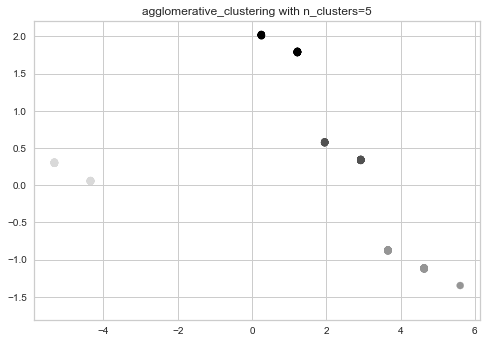

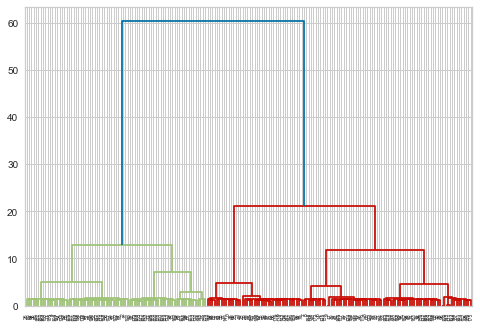

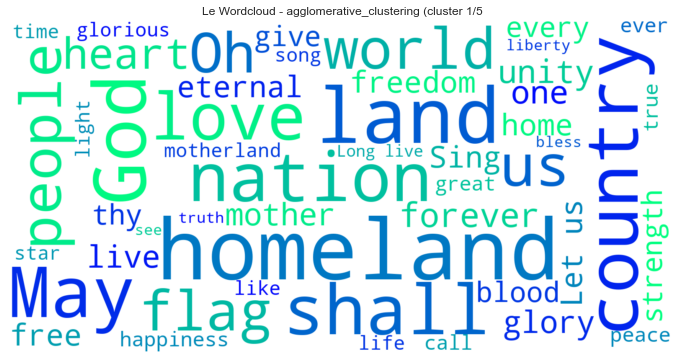

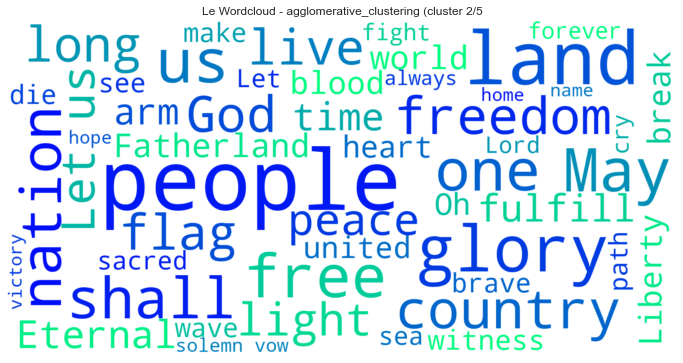

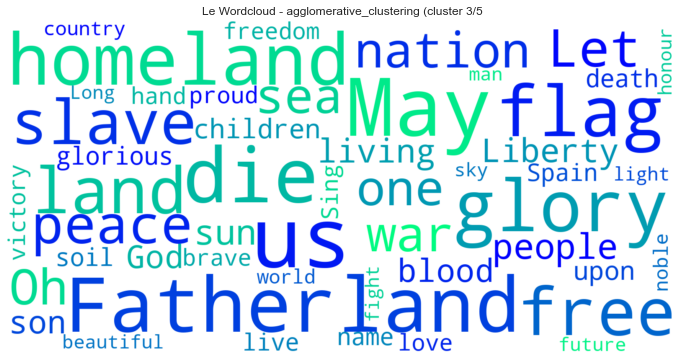

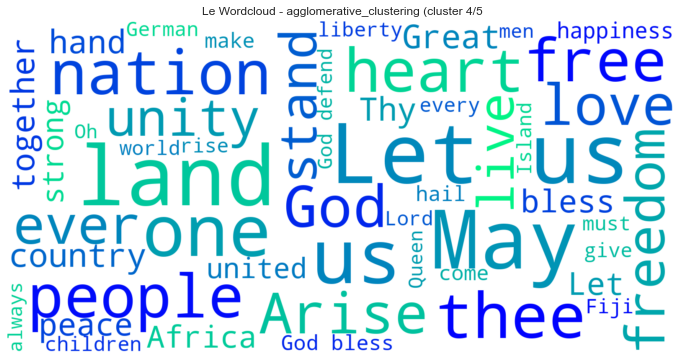

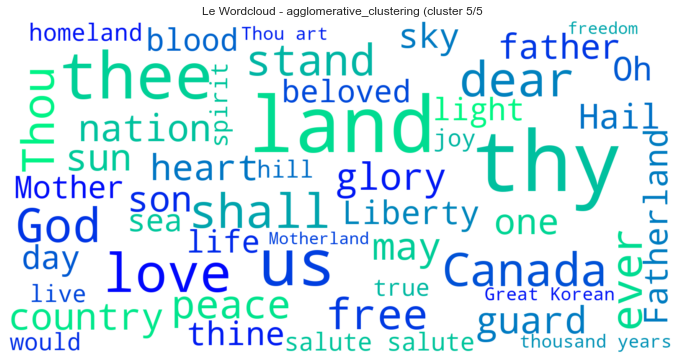


Finished in 0:00:06.977435.



In [20]:
models = {
    "k_means": {
        "model": KMeans,
        "silhouette": True,
        "inter-cluster": True,
        "dendrogram": False,
        "kwargs": {"init": "k-means++"}
    },
    "agglomerative_clustering": {
        "model": AgglomerativeClustering,
        "silhouette": False,
        "inter-cluster": False,
        "dendrogram": True,
        "kwargs": {"affinity": "euclidean", "linkage": "ward", "compute_distances": True}
    }
}
k_range = (2, 20)

for model_key in models:
    # Get model
    utils.print.title(f"Text processing with {model_key}")
    model_start = timer()
    model_infos = models[model_key]

    # Elbow and Silhouette visualizers
    utils.print.title("KElbowVisualizer", char="~")
    elbow_optimal_k = utils.visualizer.k_elbow(
        tfidf_vectorized_data, model_infos["model"],
        k=k_range, verbose=True,
        **model_infos["kwargs"]
    )

    if model_infos["silhouette"]:
        utils.print.title("SilhouetteVisualizer", char="~")
        silhouette_optimal_k = utils.visualizer.silhouette(
            tfidf_vectorized_data, model_infos["model"],
            k=k_range, verbose=True,
            **model_infos["kwargs"]
        )
    else:
        silhouette_optimal_k = elbow_optimal_k

    # Use optimal k
    utils.print.title("Optimal model", char="~")
    optimal_k = int(round(((elbow_optimal_k + silhouette_optimal_k) / 2), 0))
    model_infos["kwargs"]["n_clusters"] = optimal_k

    print(f"Using {Fore.LIGHTGREEN_EX}n_clusters={optimal_k}{Fore.RESET}")
    optimal_model = model_infos["model"](**model_infos["kwargs"])
    optimal_fit = optimal_model.fit(tfidf_vectorized_data)
    cluster_row_name = f"Cluster_{model_key}"

    data[cluster_row_name] = optimal_fit.labels_
    tfidf_vectorized_data[cluster_row_name] = optimal_fit.labels_
    print(data.sample(n=10))

    # Inter-cluster distance
    if model_infos["inter-cluster"]:
        utils.visualizer.inter_cluster_distance(tfidf_vectorized_data, model_infos["model"](**model_infos["kwargs"]))

    # PCA
    utils.plot.pca(tfidf_vectorized_data, cluster_row_name, f"{model_key} with n_clusters={optimal_k}")

    # Dendrogram
    if model_infos["dendrogram"]:
        utils.plot.dendrogram(optimal_model)

    # Cluster per countries
    clusters_map = utils.plot.Map()
    utils.plot.MapLayer("Cluster per countries", show_default=True) \
        .add_to(clusters_map) \
        .load_dataframe(data) \
        .to_choropleth(
        geo_data=f"{utils.plot.folium_data}/world-countries.json",
        columns=["Alpha-3", cluster_row_name],
        name="Cluster per countries",
        legend_name="Cluster IDs",
    )

    clusters_map.open(notebook=True)

    # Wordcloud
    clusters = data[cluster_row_name].drop_duplicates().sort_values().tolist()

    for cluster in clusters:
        utils.plot.generate_wordcloud(
            data["Anthem"][data[cluster_row_name] == cluster],
            title=f"Le Wordcloud - {model_key} (cluster {cluster + 1}/{clusters[-1] + 1}"
        )

    # Model end
    model_end = timer()
    model_elapsed_time = timedelta(seconds=model_end - model_start)
    print(f"\n{Fore.LIGHTBLUE_EX}Finished in {model_elapsed_time}.\n")